<a href="https://colab.research.google.com/github/hflautert/AnomalyDetection/blob/main/MQTTset-Malaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Experimento de reconhecimento de anomalias em ataque DoS do tipo MQTT.

Fonte de dados: https://www.kaggle.com/datasets/cnrieiit/mqttset

VACCARI, Ivan; CHIOLA, Giovanni; AIELLO, Maurizio; MONGELLI, Maurizio;
CAMBIASO, Enrico. MQTTset, a new dataset for machine learning techniques on
MQTT. Sensors, MDPI, v. 20, n. 22, p. 6578, 2020

Rede normal: capture_1w.pcap

Rede com ataque: capture_malariaDoS.pcap

Para gerar as estatísticas, os arquivos foram abertos com WireShark, aplicado filtro `mqtt`. Posteriormente gerado dados no menu Statistics, I/O Graph, salvo como csv, nos intervalos de 100ms, 500ms e 1 segundo.

In [2]:
# Importando bibliotecas
# Manipulação de matrizes e operações matemáticas de alto nível
import numpy as np
# Geração de gráficos
import matplotlib.pyplot as plt
# Funcoes media movel
import httpimport
url = "https://gist.githubusercontent.com/hflautert/c0d5dee869cb369a912de6b8c02d457e/raw/5878dc67cac9ddfc26345a95b35c4f96ace6d57d"
with httpimport.remote_repo(url):
  import funcoesmm as fmm

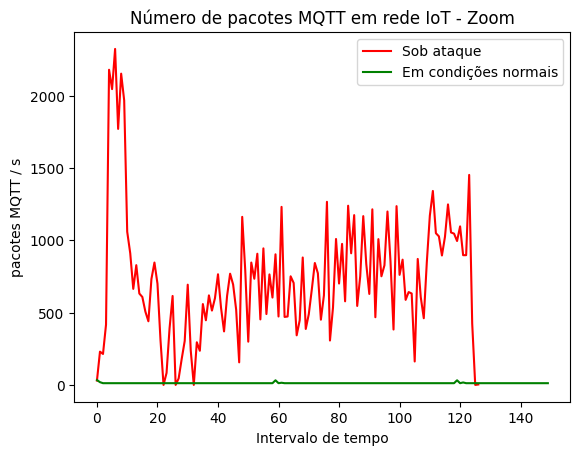

In [6]:
# Carregando dados
dados_normal_100ms=fmm.prep_csv("https://raw.githubusercontent.com/hflautert/AnomalyDetection/main/StatsMQTTset/capture_1w_100ms.csv")
dados_normal_500ms=fmm.prep_csv("https://raw.githubusercontent.com/hflautert/AnomalyDetection/main/StatsMQTTset/capture_1w_500ms.csv")
dados_normal_1s=fmm.prep_csv("https://raw.githubusercontent.com/hflautert/AnomalyDetection/main/StatsMQTTset/capture_1w_1s.csv")

dados_ataque_100ms=fmm.prep_csv("https://raw.githubusercontent.com/hflautert/AnomalyDetection/main/StatsMQTTset/capture_malariaDoS_100ms.csv")
dados_ataque_500ms=fmm.prep_csv("https://raw.githubusercontent.com/hflautert/AnomalyDetection/main/StatsMQTTset/capture_malariaDoS_500ms.csv")
dados_ataque_1s=fmm.prep_csv("https://raw.githubusercontent.com/hflautert/AnomalyDetection/main/StatsMQTTset/capture_malariaDoS_1s.csv")

tipo_dos_pacotes='MQTT'

#fmm.visualiza(dados_normal_1s,'s','g','Rede IoT em condições normais',tipo_dos_pacotes)
#fmm.visualiza(dados_ataque_1s,'s','r','Rede IoT sob ataque',tipo_dos_pacotes)
#fmm.visualizamix(dados_ataque_1s,'r',dados_normal_1s,'g','s',tipo_dos_pacotes)

# Vizualização otimizada com zoom na janela de ataque de 1, 10 e 100 pcts/s
v_dados_normal_1s = dados_normal_1s[:150]
v_dados_ataque_1s = dados_ataque_1s[:150]

# Unindo linhas
plt.plot(v_dados_ataque_1s, color = 'r', label = "Sob ataque")
plt.plot(v_dados_normal_1s, color = 'g', label = "Em condições normais")
plt.title('Número de pacotes '+tipo_dos_pacotes+' em rede IoT - Zoom')
plt.xlabel('Intervalo de tempo')
plt.ylabel('pacotes '+tipo_dos_pacotes+' / s')
plt.legend()
plt.show()

In [ ]:
ataque,f_positivo=aplica_modelo(dados_normal_1s,dados_ataque_1s,1.10,10,2)
ataque,f_positivo=aplica_modelo(dados_normal_500ms,dados_ataque_500ms,1.10,15,1)
ataque,f_positivo=aplica_modelo(dados_normal_100ms,dados_ataque_100ms,1.10,40,1)

Total de ataques identificados: 1


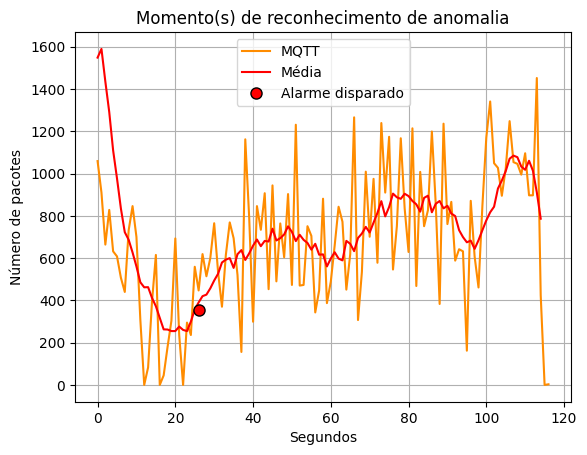

Falsos positivos: 0


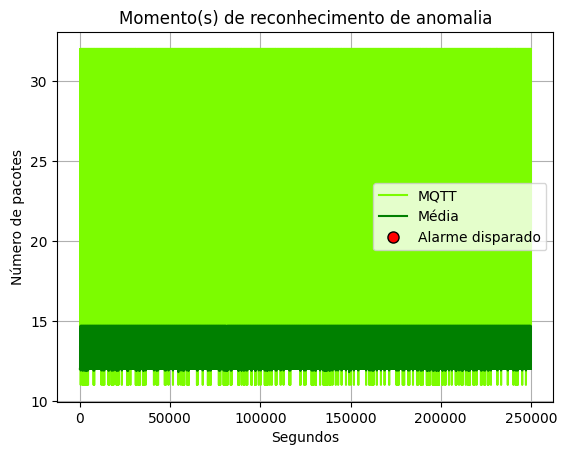

In [7]:
## Para reaproveitamento das chamadas
dados_normal=dados_normal_1s
dados_ataque=dados_ataque_1s
unidade_de_tempo='Segundos'
delta=1.10
intervalo=10
taxa_minima=2

ataques_reconhecidos,falsos_positivos,alarme_normal_pos,alarme_normal_val,alarme_ataque_pos,alarme_ataque_val,media_normal,media_ataque=fmm.aplica_modelo(dados_normal,dados_ataque,delta,intervalo,taxa_minima)

print ("Total de ataques identificados:",ataques_reconhecidos)
fmm.visualiza_alarmes(dados_ataque,alarme_ataque_pos,alarme_ataque_val,unidade_de_tempo,tipo_dos_pacotes,intervalo,'darkorange','r',media_ataque)

print ("Falsos positivos:",falsos_positivos)
fmm.visualiza_alarmes(dados_normal,alarme_normal_pos,alarme_normal_val,unidade_de_tempo,tipo_dos_pacotes,intervalo,'lawngreen','g',media_normal)


Total de ataques identificados: 1


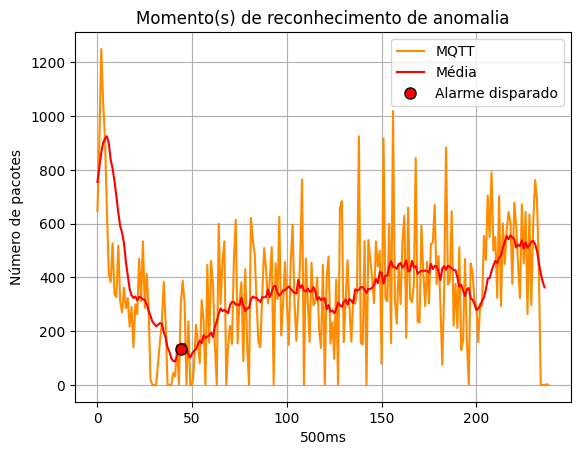

Falsos positivos: 0


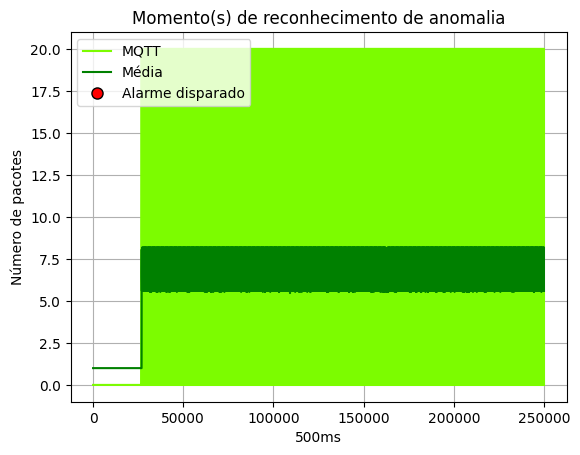

In [10]:
## Para reaproveitamento das chamadas
dados_normal=dados_normal_500ms
dados_ataque=dados_ataque_500ms
unidade_de_tempo='500ms'
delta=1.10
intervalo=15
taxa_minima=1

ataques_reconhecidos,falsos_positivos,alarme_normal_pos,alarme_normal_val,alarme_ataque_pos,alarme_ataque_val,media_normal,media_ataque=fmm.aplica_modelo(dados_normal,dados_ataque,delta,intervalo,taxa_minima)

print ("Total de ataques identificados:",ataques_reconhecidos)
fmm.visualiza_alarmes(dados_ataque,alarme_ataque_pos,alarme_ataque_val,unidade_de_tempo,tipo_dos_pacotes,intervalo,'darkorange','r',media_ataque)

print ("Falsos positivos:",falsos_positivos)
fmm.visualiza_alarmes(dados_normal,alarme_normal_pos,alarme_normal_val,unidade_de_tempo,tipo_dos_pacotes,intervalo,'lawngreen','g',media_normal)


Total de ataques identificados: 1


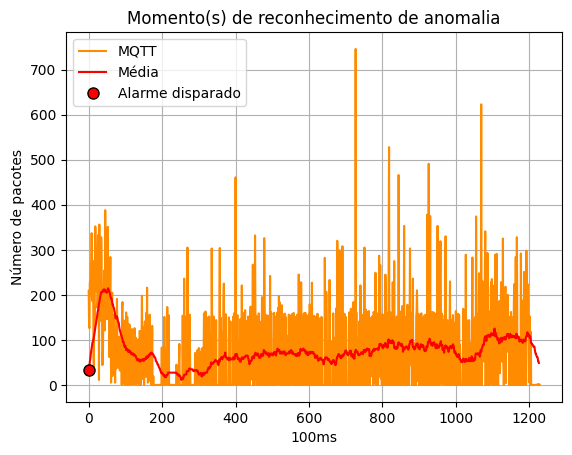

Falsos positivos: 0


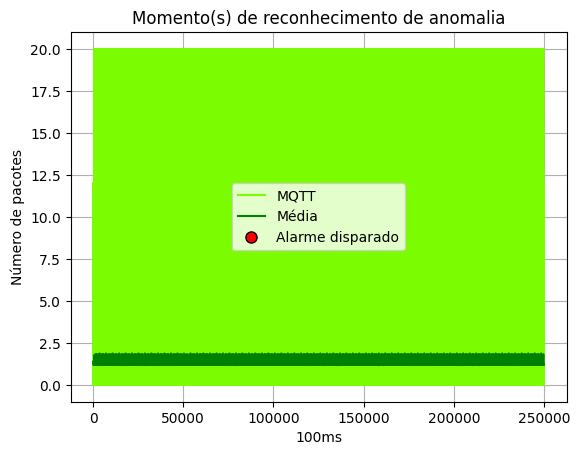

In [11]:
## Para reaproveitamento das chamadas
dados_normal=dados_normal_100ms
dados_ataque=dados_ataque_100ms
unidade_de_tempo='100ms'
delta=1.10
intervalo=40
taxa_minima=1

ataques_reconhecidos,falsos_positivos,alarme_normal_pos,alarme_normal_val,alarme_ataque_pos,alarme_ataque_val,media_normal,media_ataque=fmm.aplica_modelo(dados_normal,dados_ataque,delta,intervalo,taxa_minima)

print ("Total de ataques identificados:",ataques_reconhecidos)
fmm.visualiza_alarmes(dados_ataque,alarme_ataque_pos,alarme_ataque_val,unidade_de_tempo,tipo_dos_pacotes,intervalo,'darkorange','r',media_ataque)

print ("Falsos positivos:",falsos_positivos)
fmm.visualiza_alarmes(dados_normal,alarme_normal_pos,alarme_normal_val,unidade_de_tempo,tipo_dos_pacotes,intervalo,'lawngreen','g',media_normal)
